In [ ]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

# Machine Learning
import sklearn.metrics as metrics

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize
from nltk.corpus import stopwords

from IPython.display import display

%pip install svgling
%pip install datasets

pd.options.mode.chained_assignment = None

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" 

In [ ]:
from datasets import load_dataset

babe_dataset = load_dataset("mediabiasgroup/BABE")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/770 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/712k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/233k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3121 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [ ]:
# convert to df
babe_df = pd.DataFrame(babe_dataset['train'])
babe_df_cleaned = babe_df[['text', 'topic']]

babe_df_cleaned.loc[:, 'topic'] = babe_df_cleaned.loc[:, 'topic'].apply(lambda x: " ".join(x.split("-")))

# print number of unique topics
print("Number of unique topics:", len(babe_df_cleaned['topic'].unique()))

babe_df_cleaned.head()

Number of unique topics: 22


,text,topic
0,NYPD Commissioner Dermot Shea on Monday expres...,marriage equality
1,School systems across the country are adopting...,islam
2,"And then along came President Barry Obama, who...",marriage equality
3,"The curfews, which have never before occurred ...",elections 2020
4,"Rather than help be a part of the solution, Tr...",elections 2020


# Q1

In [ ]:
def make_tokens(df: pd.DataFrame) -> pd.DataFrame:
  ## Your code starts here ##
  #punkt tokenization and making all words lowercase
  df['tokens'] = df['text'].apply(lambda x: word_tokenize(x.lower()))
  ## end ##
  return df

In [ ]:
babe_df_cleaned = make_tokens(babe_df_cleaned)
print(babe_df_cleaned.loc[0, 'tokens'])

['nypd', 'commissioner', 'dermot', 'shea', 'on', 'monday', 'expressed', 'support', 'for', 'diverting', 'funds', 'away', 'from', 'the', 'police', 'department', 'and', 'to', 'other', 'areas', ',', 'like', 'youth', 'programs', '.']


# Q2

In [ ]:
def clean_tokens(df: pd.DataFrame) -> pd.DataFrame:
  ## Your code starts here ##
  stop_words = set(stopwords.words("english"))
  #making sure that non-alphanumeric characters and stop words are removed
  df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.isalpha() and word not in stop_words])
  ## end ##
  return df

In [ ]:
babe_df_cleaned = clean_tokens(babe_df_cleaned)
print(babe_df_cleaned['tokens'].iloc[0])


['nypd', 'commissioner', 'dermot', 'shea', 'monday', 'expressed', 'support', 'diverting', 'funds', 'away', 'police', 'department', 'areas', 'like', 'youth', 'programs']


# Q3



In [ ]:
from nltk.stem.snowball import SnowballStemmer
def stem_tokens(df: pd.DataFrame) -> pd.DataFrame:
  ## Your code starts here ##
  snowball_stemmer = SnowballStemmer("english")
  #new column for stemmed words
  df['tokens_stemmed'] = df['tokens'].apply(lambda words: [snowball_stemmer.stem(word) for word in words])
  ## end ##
  return df

In [ ]:
babe_df_cleaned = stem_tokens(babe_df_cleaned)
print(babe_df_cleaned['tokens_stemmed'].iloc[0])

['nypd', 'commission', 'dermot', 'shea', 'monday', 'express', 'support', 'divert', 'fund', 'away', 'polic', 'depart', 'area', 'like', 'youth', 'program']


# Q4

## (a)

<Axes: title={'center': 'Zipf Plot of Word Frequency'}, xlabel='Words', ylabel='Frequency'>

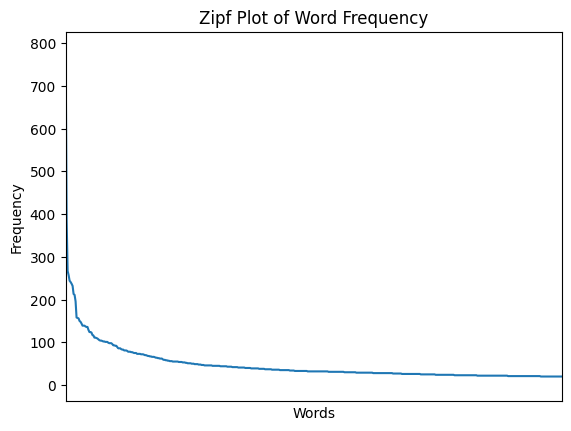

In [ ]:
## Your code starts here ##
token_count_babe = Counter()

for words in babe_df_cleaned['tokens']:
  token_count_babe.update(words)
#creating plot for the frequency of words
words_freq_babe= pd.DataFrame.from_dict(token_count_babe, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)
ax = words_freq_babe.plot(legend=False, xlabel='Words', ylabel='Frequency', title='Zipf Plot of Word Frequency')
ax.set_xticks([])
ax.set_xlim(0, 500)
ax
## end ##

Enter answer here:

We call this frequency the Zipf Frequency

## (b)

In [ ]:
## Your code starts here ##
#printing the top ten words based on frequency in the dataset
print(words_freq_babe.head(10))
## end ##

             frequency
trump              787
president          385
said               267
people             257
would              244
new                241
white              237
donald             232
coronavirus        213
police             211


# Q5

## (a)

In [ ]:
## Your code starts here ##
words_freq_babe['tokens'] = words_freq_babe.index
# Get the top 400 words from the frequency list
top_400_words = words_freq_babe.index[:400]
text = []
topics = [] # Initialize a list to store topics
for index, entry in enumerate(babe_df_cleaned['tokens']):
  tempCounter = Counter(entry)
  # Check if each word in top_400_words is present in the current entry
  top_400_wordsinText = [1 if word in tempCounter else 0 for word in top_400_words]
  text.append(top_400_wordsinText) #add the words to list named text
  topics.append(babe_df_cleaned.loc[index, 'topic'])
#creating a dataframe for the top 400 words based on topic
freqTextDF = pd.DataFrame(text)
freqTextDF.columns = top_400_words
freqTextDF['topic'] = topics
#function to calculate MI scores for the top 400 words
def getMI(top_400_words, df, label_column='topic'):
  unique_labels = df[label_column].unique()

  overallDF = pd.DataFrame()
  #lopping through each topic
  for topic in unique_labels:
    miScore = []

    label_col = df[label_column].copy()
    label_col[label_col != topic] = 0
    label_col[label_col == topic] = 1
    #getting the mi score for each word in the current topic
    for word in top_400_words:
      miScore.append([word, metrics.mutual_info_score(label_col, df[word]), topic])
    miScoredf = pd.DataFrame(miScore, columns=['Word', 'MI Score', 'Topic']).sort_values('MI Score', ascending=False)
    overallDF = pd.concat([overallDF, miScoredf])
  return overallDF

mi_scores = getMI(top_400_words, freqTextDF)
mi_scores = mi_scores.set_index(['Word']).groupby('Topic')['MI Score'].nlargest(10).reset_index()
print(mi_scores)
## end ##

                 Topic         Word  MI Score
0               #metoo        women  0.003842
1               #metoo        trump  0.001975
2               #metoo  transgender  0.001390
3               #metoo     movement  0.001252
4               #metoo     business  0.001135
..                 ...          ...       ...
215  white nationalism    christian  0.002106
216  white nationalism        biden  0.001941
217  white nationalism       police  0.001649
218  white nationalism          gun  0.001636
219  white nationalism          tax  0.001520

[220 rows x 3 columns]


## (b)

In [ ]:
## Your code starts here ##
token_count_babe_stemmed = Counter()
for words in babe_df_cleaned['tokens_stemmed']:
    token_count_babe_stemmed.update(words)

# Get the top 400 stemmed tokens
words_freq_babe_stemmed = pd.DataFrame.from_dict(token_count_babe_stemmed, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)
top_400_words_stemmed = words_freq_babe_stemmed.index[:400]

#initializing lists
text_stemmed = []
topics_stemmed = []
for index, entry in enumerate(babe_df_cleaned['tokens_stemmed']):
    tempCounter = Counter(entry)
    top_400_wordsinText = [1 if word in tempCounter else 0 for word in top_400_words_stemmed]
    text_stemmed.append(top_400_wordsinText)
    topics_stemmed.append(babe_df_cleaned.loc[index, 'topic'])

freqTextDF_stemmed = pd.DataFrame(text_stemmed)
freqTextDF_stemmed.columns = top_400_words_stemmed
freqTextDF_stemmed['topic'] = topics_stemmed

# Calculate MI scores for stemmed tokens
mi_scores_stemmed = getMI(top_400_words_stemmed, freqTextDF_stemmed)
mi_scores_stemmed = mi_scores_stemmed.set_index(['Word']).groupby('Topic')['MI Score'].nlargest(10).reset_index()
print(mi_scores_stemmed)
## end ##

                 Topic    Word  MI Score
0               #metoo  sexual  0.007679
1               #metoo   women  0.003842
2               #metoo   power  0.002031
3               #metoo   accus  0.002022
4               #metoo   trump  0.001980
..                 ...     ...       ...
215  white nationalism     tax  0.001927
216  white nationalism     gun  0.001868
217  white nationalism    view  0.001784
218  white nationalism   polic  0.001714
219  white nationalism    citi  0.001563

[220 rows x 3 columns]


## (c)


Enter answer here:

MI scores tell us the info shared in the relationships between tokens and topics by measuring the dependence between word and topic. The stemmed table was more useful since stemming reduces the words to their root form which will group similar words and stronger topic associations through higher MI scores.